source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook

# Types of videos that trend in the US

Which factors matter the most in order to trend? Is it category, title, views, and or tags?
First we create a subset of the data to only show us US.

Before I started I installed a package called pandasql so I can do SQL queries within Python.

##Place Bar graph below for LIKE vs VIEWS within US. 

My HYPOTHESIS is that likes matter more than views in determining what trends. What I found is that while likes and views are important, a video can be viewed alot of times but is not necessarily liked or trending. However a video that has the most likes is definitely trending.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [23]:
import pandasql as ps
US = df.loc[df['country'] == 'US']
US.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
310,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,Tati,26,Howto & Style,2017-11-08,18:00:05,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1277364,56867,2148,25326,https://i.ytimg.com/vi/o78x918zbFk/default.jpg,False,False,False,This was the most UNEXPECTED WTF I've done so ...,US
311,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,22,People & Blogs,2017-11-08,22:13:18,"madelaine|""madelainepetsch""|""madelaine petsch""...",280065,20289,38,939,https://i.ytimg.com/vi/6ixU_vdE0Es/default.jpg,False,False,False,I asked Travis to replicate my everyday makeup...,US
312,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09,18:01:04,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,US
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US
314,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,Sports,2017-11-09,07:27:32,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,US


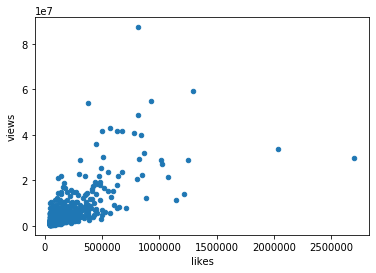

In [33]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes,views, tags, category  FROM US ORDER by likes  DESC limit 1000"""
usdf = ps.sqldf(q1, locals())
usdf
usdf.plot(kind='scatter', x='likes', y='views')

In [35]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes,views, tags, category  FROM US ORDER by likes  DESC limit 1000"""
usdf = ps.sqldf(q1, locals())
usdf

onTrend = "SELECT title from usdf WHERE likes > 2500000;"
ps.sqldf(onTrend, locals())

,title
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...


In [3]:
q1 = """SELECT title, likes, tags  FROM US ORDER by likes DESC limit 10"""

print(ps.sqldf(q1, locals()))

                                               title    likes  \
0  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...  2700800   
1                                        we broke up  2032463   
2                      VENOM - Official Trailer (HD)  1295189   
3                  Demi Lovato - Tell Me You Love Me  1251825   
4                                LOGAN PAUL IS BACK!  1216340   
5  [CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...  1141726   
6                       Red Velvet 레드벨벳 'Bad Boy' MV  1072246   
7  Ed Sheeran - Perfect Symphony (with Andrea Boc...  1025895   
8             Real Life Trick Shots 2 | Dude Perfect  1017919   
9           Selena Gomez - Back To You (Lyric Video)   922355   

                                                tags  
0          BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"  
1  lizzza|"lizza"|"liza"|"koshy"|"david"|"dobrik"...  
2  Venom|"Venom Movie"|"Venom (2018)"|"Marvel"|"M...  
3  Demi Lovato|"Tell Me You Love Me"|"Jesse Willi...  
4  logan 

##Show limit 10 query

I limit the data to the top 10 trending and I am surprised that Kpop takes the lead. Pop is a close second. Music videos are popular in the US. Let's dig deeper. 

In [4]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes, tags, category  FROM US ORDER by likes  DESC limit 49"""
usdf = ps.sqldf(q1, locals())
usdf

,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,we broke up,2032463,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",People & Blogs
2,VENOM - Official Trailer (HD),1295189,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",Entertainment
3,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
4,LOGAN PAUL IS BACK!,1216340,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",Entertainment
5,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,1141726,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",Music
6,Red Velvet 레드벨벳 'Bad Boy' MV,1072246,"Red Velvet|""레드벨벳""|""Bad Boy""|""The Perfect Red V...",Music
7,Ed Sheeran - Perfect Symphony (with Andrea Boc...,1025895,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",Music
8,Real Life Trick Shots 2 | Dude Perfect,1017919,"dude perfect|""dude perfect stereotypes""|""dude ...",Sports
9,Selena Gomez - Back To You (Lyric Video),922355,"selena gomez|""13 reasons why""|""back to you""|""s...",Film & Animation


##Show limit 49 query

This time I select the top 49 trending, music is still very popular. I decide to dig deeper into the tags and hit a snag. Using the video tags is not the most reliable way to get information as videos can have unrelated tags. 

EX: A Kpop video would have a hiphop tag while a hip hop video wouldn't have a hip hop tag. Instead of digging deeper into the music and the trending determining factors behind the video, I decide to broaden my subset and go a different direction. 

In [5]:
US = df.loc[df['country'] == 'US']
q1 = """SELECT title,likes, tags, category  FROM US ORDER by likes  DESC limit 1000"""
usdf = ps.sqldf(q1, locals())
usdf

,title,likes,tags,category
0,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",Music
1,we broke up,2032463,"lizzza|""lizza""|""liza""|""koshy""|""david""|""dobrik""...",People & Blogs
2,VENOM - Official Trailer (HD),1295189,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",Entertainment
3,Demi Lovato - Tell Me You Love Me,1251825,"Demi Lovato|""Tell Me You Love Me""|""Jesse Willi...",Music
4,LOGAN PAUL IS BACK!,1216340,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",Entertainment
...,...,...,...,...
995,"Lilly Singh on YouTube, The Rock & Her Parents",42501,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",Entertainment
996,70 People from 70 Countries Sing Their Country...,42447,"national anthem|""anthem""|""canadian national an...",Travel & Events
997,Bob Saget Hiccups Uncontrollably While Eating ...,42380,"bob saget|""hot ones""|""sean evans""|""spicy wings...",Howto & Style
998,Smartphone DURABILITY Awards 2017!,42326,"SmartPhone awards|""smartphone durability award...",Howto & Style


##Show limit 1000 query

I limit my subset to 1000 and immediately notice that Music while still the most popular, in terms of count, Entertainment has shown up way more times than Music. Below is a pie chart used to demonstrate the number of times a  category appeared within the data.

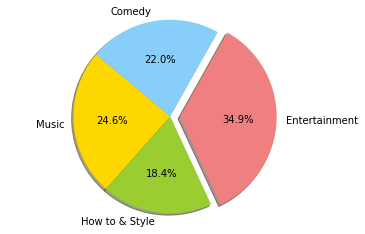

In [13]:
labels = 'Music', 'How to & Style', 'Entertainment', 'Comedy'
sizes = [164, 123, 233, 147]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # explode 3rd slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Top 4 categories: Entertainment, Music, Comedy, How to & Style 
#TOP 4 trending - Pie chart

In [30]:
qcat = "SELECT category, likes, views FROM usdf GROUP BY category ORDER by likes DESC limit 1000;"
ps.sqldf(qcat,locals())

,category,likes,views
0,Music,2700800,29741771
1,People & Blogs,2032463,33627806
2,Entertainment,1295189,59254638
3,Sports,1017919,29090799
4,Film & Animation,922355,54863912
5,Comedy,825258,29178096
6,Howto & Style,605954,9233435
7,Science & Technology,564804,42799458
8,Gaming,444203,7547432
9,Nonprofits & Activism,365439,5579079


Now, I have decided to take a deeper look at the Entertainment category with comparison of views vs likes.

**Final Thoughts: From looking through the data, I learned how unreliable it can be in regards to what you might be looking for. Also, never trust your data. It's well and good to take a snapshot but make sure you take a bigger data sample. Snags, roadblocks, and rabbit holes are your friend because it helps you learn more about the data and its limitations.